In [1]:
from utils.dataset_utils import OriginalDataset, plot_image
from utils.utils import get_storage
import numpy as np

original_dataset_path = "datasets/droid_100_sample_pictures"
ds = OriginalDataset(data_path=original_dataset_path, color=True)

print(get_storage(ds[0]), "MB")

# Currently reporting sizes in bits with 1024
# Base line size is correct :)
height = len(ds[0])
width = len(ds[0][0])
print(height, width, "320*180*3", 320*180*3, "byte") 


1.318359375 MB
180 320 320*180*3 172800 byte


In [2]:
def get_min_max(img):
   min_value = 999999
   max_value = -99999
   for y in range(height):
      for x in range(width):
         max_value = max(max_value, max(img[y][x]))
         min_value = min(min_value, min(img[y][x]))
   return int(min_value), int(max_value)

def get_bit_packed_size(img):
   min_value, max_value = get_min_max(img)
   return (int(max_value) - int(min_value)).bit_length()

# Create delta. delta := img - base
def create_delta(base, img):
   delta = np.zeros((180, 320, 3), dtype=int)
   for y in range(height):
      for x in range(width):
         delta[y][x][0] = int(img[y][x][0]) - int(base[y][x][0])
         delta[y][x][1] = int(img[y][x][1]) - int(base[y][x][1])
         delta[y][x][2] = int(img[y][x][2]) - int(base[y][x][2])
   return delta


base = ds[0]
print("encode relative to frame of reference: img[0]")
for i in range(20):
   img = ds[i]
   delta = create_delta(base, img)
   print(f"raw img[{i}]", get_bit_packed_size(img), "-> delta img[0]", get_bit_packed_size(delta))

# Test new base img
print()
print("always to previous")
for i in range(1, 20):
   img = ds[i]
   base = ds[i-1]
   delta = create_delta(base, img)
   print(f"raw img[{i}]", get_bit_packed_size(img), f"-> delta img[{i-1}]", get_bit_packed_size(delta))



encode relative to frame of reference: img[0]
raw img[0] 8 -> delta img[0] 0
raw img[1] 8 -> delta img[0] 6
raw img[2] 8 -> delta img[0] 6
raw img[3] 8 -> delta img[0] 6
raw img[4] 8 -> delta img[0] 6
raw img[5] 8 -> delta img[0] 6
raw img[6] 8 -> delta img[0] 6
raw img[7] 8 -> delta img[0] 6
raw img[8] 8 -> delta img[0] 7
raw img[9] 8 -> delta img[0] 7
raw img[10] 8 -> delta img[0] 7
raw img[11] 8 -> delta img[0] 7
raw img[12] 8 -> delta img[0] 8
raw img[13] 8 -> delta img[0] 7
raw img[14] 8 -> delta img[0] 7
raw img[15] 8 -> delta img[0] 7
raw img[16] 8 -> delta img[0] 8
raw img[17] 8 -> delta img[0] 8
raw img[18] 8 -> delta img[0] 9
raw img[19] 8 -> delta img[0] 9

always to previous
raw img[1] 8 -> delta img[0] 6
raw img[2] 8 -> delta img[1] 6
raw img[3] 8 -> delta img[2] 6
raw img[4] 8 -> delta img[3] 6
raw img[5] 8 -> delta img[4] 6
raw img[6] 8 -> delta img[5] 6
raw img[7] 8 -> delta img[6] 6
raw img[8] 8 -> delta img[7] 7
raw img[9] 8 -> delta img[8] 7
raw img[10] 8 -> delta im

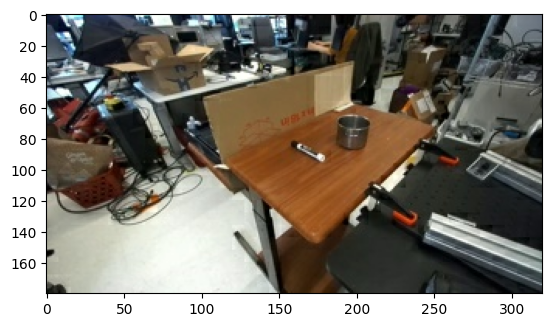

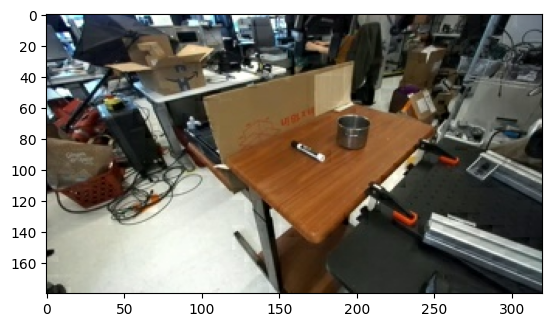

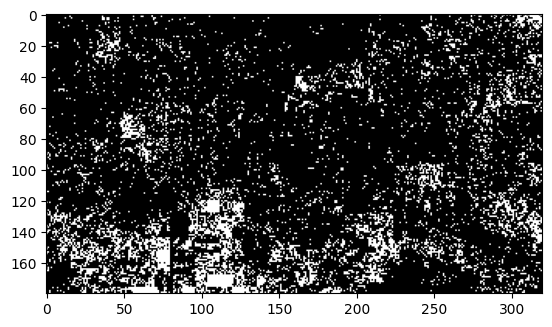

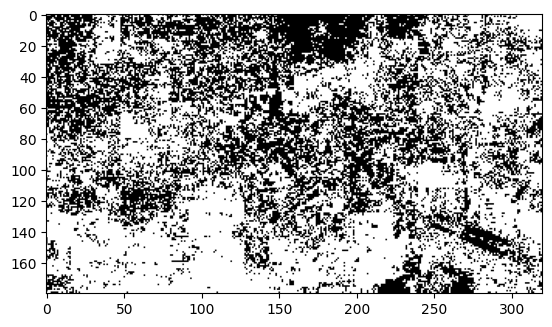

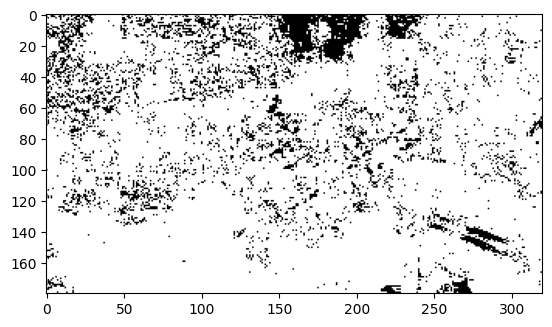

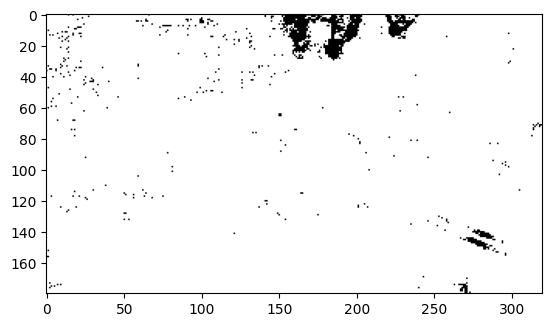

79909 pixels changed
57600 pixels totals


In [15]:
import matplotlib.pyplot as plt

changed = 0
def create_changed_pixels(base, img, threshold):
   global changed
   delta = np.zeros((180, 320, 3), dtype=int)
   for y in range(height):
      for x in range(width):
         r = int(img[y][x][0]) - int(base[y][x][0])
         g = int(img[y][x][1]) - int(base[y][x][1])
         b = int(img[y][x][2]) - int(base[y][x][2])
         if abs(r) > threshold or abs(g) > threshold or abs(b) > threshold:
            changed = changed +  1
            delta[y][x][0] = 0
            delta[y][x][1] = 0
            delta[y][x][2] = 0
         else:
            delta[y][x][0] = 255
            delta[y][x][1] = 255
            delta[y][x][2] = 255
   return delta

plt.imshow(ds[20])
plt.show()
plt.imshow(ds[21])
plt.show()
plt.imshow(create_changed_pixels(ds[20], ds[21], 0))
plt.show()
plt.imshow(create_changed_pixels(ds[20], ds[21], 2))
plt.show()
plt.imshow(create_changed_pixels(ds[20], ds[21], 4))
plt.show()
plt.imshow(create_changed_pixels(ds[20], ds[21], 8))
plt.show()

# create_changed_pixels(ds[20], ds[21])
print(changed, "pixels changed")
print(320 * 180, "pixels totals")


In [40]:
# Idea 1: Handle big changes as outlier // correlated
# Here we only show pixels that changed a lot in R, G or B
delta = create_delta(ds[20], ds[21])
for y in range(height):
   for x in range(width):
      if (delta[y][x][0] >= 64 or delta[y][x][1] >= 64 or delta[y][x][2] >= 64):
         print(delta[y][x])

[ 94 101  99]
[102  95  93]
[109 112 110]
[61 63 64]
[90 84 82]
[109 104 100]
[78 77 73]
[63 67 62]
[66 62 66]
[68 66 69]
[88 86 76]
[74 72 69]
[132 143 158]
[ 93 107 119]
[66 79 88]
[63 77 90]
[123 141 156]
[134 155 167]
[134 149 161]
[55 63 75]
[66 82 94]
[101 118 136]
[123 145 161]
[139 156 171]
[48 56 69]
[16 45 75]
[45 59 77]
[ 74  91 110]
[101 117 132]
[75 84 99]
[55 62 70]
[88 81 77]
[134 128 123]
[114 109 103]


In [46]:
# Idea 2: Use png encoding on top of delta

delta = create_delta(ds[20], ds[21])

# save delta as png file
from PIL import Image
print(get_min_max(delta))
im = Image.fromarray(delta.astype(np.uint8)) # BUG: This is lossy !!!
im.save("delta.png")

# get size of file
import os
print("raw size:", get_bit_packed_size(delta) * 180 * 320 * 3 / 8)
print("png size:", os.path.getsize("delta.png"))

(-174, 171)
raw size: 194400.0
png size: 66137
